In [1]:
import os
import datautil
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

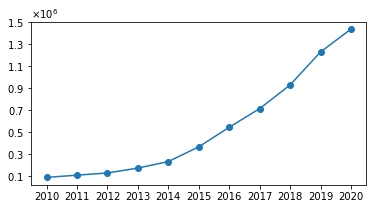

In [2]:
fig, ax = plt.subplots(1,1,figsize=(6,3))
ax.plot(
    [i for i in range(2010, 2021)], 
    [86161, 106285, 126711, 170816, 230321, 364218, 542136, 711942, 927345, 1228004, 1435600], 
    marker="o")
ax.set_yticks([i * 10**5 for i in range(1, 16, 2)])
ax.set_xticks([i for i in range(2010, 2021)])
ax.ticklabel_format(axis="y", style="sci", useMathText=True, useOffset=False)
fig.savefig("plots/growth.pdf", bbox_inches="tight")

In [3]:
libraries = datautil.select_libraries_from_libraries_io()
dep_changes = datautil.select_dependency_changes_all()
added_projects = defaultdict(set)
for idx, chg in dep_changes[dep_changes["type"] == "add"].iterrows():
    added_projects[chg["lib2"]].add(chg["project"])
libraries["addedProjects"] = libraries["name"].map(lambda x: len(added_projects[x]))

In [4]:
libraries["versionsCount"] = libraries["name"].map(lambda x: len(datautil.select_library_versions(x)))

In [5]:
libraries[["dependentRepositoriesCount", "addedProjects", "versionsCount"]].describe()

,dependentRepositoriesCount,addedProjects,versionsCount
count,14630.000000,14630.000000,14630.000000
mean,560.251538,26.419754,46.804853
std,5438.455347,167.341998,122.982477
min,11.000000,0.000000,0.000000
25%,18.000000,1.000000,6.000000
50%,37.000000,4.000000,19.000000
75%,109.000000,12.000000,49.000000
max,408330.000000,11774.000000,4598.000000


In [6]:
libraries[libraries.addedProjects > 10].describe()

,_id,repositoryId,sourceRank,repositoryStarCount,repositoryForkCount,repositoryWatchersCount,repositorySourceRank,dependentProjectsCount,dependentRepositoriesCount,addedProjects,versionsCount
count,4.022000e+03,4.022000e+03,4022.000000,4022.000000,4022.000000,4022.000000,4022.000000,4022.000000,4022.000000,4022.000000,4022.000000
mean,6.643180e+05,1.310211e+06,12.566882,2236.924167,1053.912481,176.266037,7.682994,97.478866,1866.325957,87.677524,52.037792
std,6.415018e+05,5.352344e+06,4.748526,7389.189020,4151.201554,556.732969,7.931452,666.910803,10231.940001,310.938776,104.198181
min,3.349670e+05,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,11.000000,0.000000
25%,3.662810e+05,0.000000e+00,9.000000,0.000000,0.000000,0.000000,0.000000,6.000000,90.000000,15.000000,9.000000
50%,3.981015e+05,1.650765e+05,12.000000,3.000000,7.500000,6.000000,7.000000,15.000000,216.500000,25.000000,26.000000
75%,6.380495e+05,1.737248e+05,16.000000,753.750000,302.000000,81.000000,15.000000,44.000000,674.750000,57.000000,63.000000
max,4.707317e+06,4.124831e+07,29.000000,46234.000000,28390.000000,3420.000000,25.000000,27481.000000,408330.000000,11774.000000,2214.000000


In [7]:
# libraries[libraries.addedProjects >= 10].sample(94).to_csv("sampled_libraries.csv", index=False)

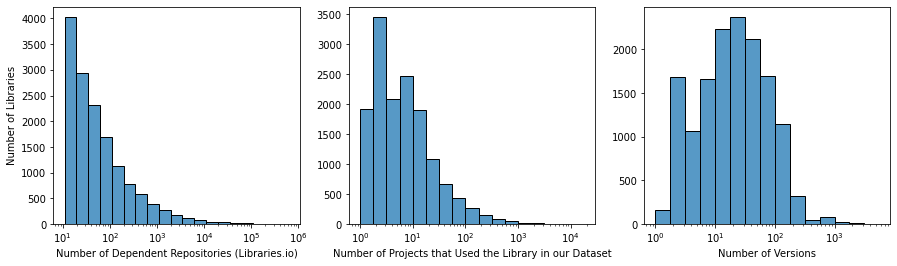

In [8]:
ylabels = ["Number of Libraries", "", ""]
xlabels = ["Number of Dependent Repositories (Libraries.io)", "Number of Projects that Used the Library in our Dataset", "Number of Versions"]
fig, axes = plt.subplots(1, 3, figsize=(15,4))
sns.histplot(data=libraries, x="dependentRepositoriesCount", binwidth=0.25, log_scale=True, ax=axes[0])
sns.histplot(data=libraries["addedProjects"] + 1, binwidth=0.25, log_scale=True, ax=axes[1])
sns.histplot(data=libraries["versionsCount"] + 1, binwidth=0.25, log_scale=True, ax=axes[2])
for i in range(0, 3):
    axes[i].set_xlabel(xlabels[i])
    axes[i].set_ylabel(ylabels[i])
fig.savefig("plots/libraries.pdf", bbox_inches="tight")